## ipl Score Prediction

 Within a short period, the IPL has become the highest revenue-generating league in cricket. In a cricket match, we often see the scoreline showing the probability of the team winning based on the current match situation. This prediction is usually done with the help of data analytics. Before, when there were no advancements in machine learning, predictions were usually based on intuition or some basic algorithms. 

 Why Deep Learning?</br>
We humans can’t easily identify patterns from huge data and thus here, machine learning and deep learning comes into play. It learns how the players and teams have performed against the opposite team previously and trains the model accordingly. Using only machine learning algorithm gives a moderate accuracy therefore we used deep learning which gives much better performance than our previous model and considers the attributes which can give accurate results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 

In [2]:
df=pd.read_csv("ipl_data.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
df.shape

(76014, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

In [8]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [10]:
df['batsman'].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'T Kohli',
       'YK Pathan', 'SR Watson', 'M Kaif', 'DS Lehmann', 'RA Jadeja',
       'M Rawat', 'D Salunkhe', 'SK Warne', 'SK Trivedi', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'AC Gilchrist',
       'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'RG Sharma',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'K Goel', 'JR Hopes', 'KC Sangakkara', 'DPMD Jayawardene',
       'Yuvraj Singh', 'IK Pathan', 'S Sohal', 'B Lee', 'PP Chawla',
       'WA Mota', 'Shahid Afridi', 'RR Sarwan', 'S Sreesanth',
       'VRV Singh', 'S Chanderpaul', 'R Dravid', 'LRPL Taylor',
       'JH Kallis', 'V Kohli', 'MV Boucher', 'P Kumar', 'SB Joshi',
       'Z Khan', 'R Vinay Kumar', 'WP Saha', 'LR Shukla', 'AB Ag

In [11]:
df['bowler'].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'GD McGrath', 'B Geeves',
       'MF Maharoof', 'R Bhatia', 'DL Vettori', 'R Vinay Kumar',
       'B Akhil', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'MM Patel', 'SR Watson',
       'SK Trivedi', 'SK Warne', 'D Salunkhe', 'Pankaj Singh',
       'YK Pathan', 'Mohammad Asif', 'VY Mahesh', 'SM Pollock', 'A Nehra',
       'DS Kulkarni', 'Harbhajan Singh', 'DJ Bravo', 'VS Yeligati',
       'AM Nayar', 'MA Khote', 'Sohail Tanvir', 'JDP Oram', 'MS Gony',
       'P Amarnath', 'M Muralitharan', 'Joginder Sharma', 'RP Singh',
       'DNT Zoysa', 'SB Bangar', 'Shahid Afridi', 'PP Ojha',
       'D Kalyankrishna', 'VRV Singh', 'Yuvraj Singh', 'DW Steyn',
       'CRD Fernando', 'ST Jayasuriya', 'V Kohli', 'Gagandeep Singh',
       'Umar Gul', 'SC Ganguly', 'LR Shukla', 'PJ Sangwan

**Remove same unimportant columns** 

In [12]:
df.drop(['mid','date','striker','non-striker'],axis=1,inplace=True)

In [13]:
df.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'runs',
       'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           76014 non-null  object 
 1   bat_team        76014 non-null  object 
 2   bowl_team       76014 non-null  object 
 3   batsman         76014 non-null  object 
 4   bowler          76014 non-null  object 
 5   runs            76014 non-null  int64  
 6   wickets         76014 non-null  int64  
 7   overs           76014 non-null  float64
 8   runs_last_5     76014 non-null  int64  
 9   wickets_last_5  76014 non-null  int64  
 10  total           76014 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [15]:
df.shape

(76014, 11)

In [16]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,222


In [17]:
from sklearn.preprocessing import LabelEncoder

x1=['venue','bat_team','bowl_team','batsman','bowler']

le=LabelEncoder()

for i in x1:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i])
    

venue 0        14
1        14
2        14
3        14
4        14
         ..
76009    23
76010    23
76011    23
76012    23
76013    23
Name: venue, Length: 76014, dtype: int32
bat_team 0        6
1        6
2        6
3        6
4        6
        ..
76009    7
76010    7
76011    7
76012    7
76013    7
Name: bat_team, Length: 76014, dtype: int32
bowl_team 0        12
1        12
2        12
3        12
4        12
         ..
76009    10
76010    10
76011    10
76012    10
76013    10
Name: bowl_team, Length: 76014, dtype: int32
batsman 0        328
1         61
2         61
3         61
4         61
        ... 
76009    172
76010    172
76011    172
76012    215
76013    172
Name: batsman, Length: 76014, dtype: int32
bowler 0        201
1        201
2        201
3        201
4        201
        ... 
76009     96
76010     96
76011     96
76012     96
76013     96
Name: bowler, Length: 76014, dtype: int32


In [18]:
df.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,14,6,12,328,201,1,0,0.1,1,0,222
1,14,6,12,61,201,1,0,0.2,1,0,222
2,14,6,12,61,201,2,0,0.2,2,0,222
3,14,6,12,61,201,2,0,0.3,2,0,222
4,14,6,12,61,201,2,0,0.4,2,0,222


**Data Spliting**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x=df.drop(['total'],axis=1)
y=df['total']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5
15267,1,7,12,350,4,71,3,9.3,35,1
11310,32,6,12,61,44,129,3,16.5,48,1
37601,23,9,1,276,5,62,3,10.1,30,2
52580,23,13,4,312,219,72,1,9.6,23,1
37127,8,4,2,264,113,95,6,13.4,34,3
...,...,...,...,...,...,...,...,...,...,...
37194,34,6,7,221,272,22,2,4.3,22,2
6265,26,7,9,347,292,15,0,2.6,15,0
54886,1,7,0,213,183,39,0,5.2,37,0
860,15,0,7,258,275,5,0,0.5,5,0


In [23]:
x_test

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5
12590,18,2,12,122,128,1,2,1.2,1,2
74893,9,3,2,171,72,131,3,14.3,41,0
56763,34,7,0,133,228,36,3,6.6,34,2
19428,1,7,2,350,210,104,3,13.5,40,2
30216,5,0,1,284,40,103,4,13.3,37,1
...,...,...,...,...,...,...,...,...,...,...
6519,34,9,2,321,188,21,0,3.2,21,0
72043,25,4,3,126,281,90,2,10.4,46,1
70116,7,4,6,204,306,14,0,1.4,14,0
61737,12,12,0,171,217,36,3,7.2,25,3


In [24]:
y_train

15267    151
11310    173
37601    126
52580    205
37127    136
        ... 
37194    140
6265     145
54886    173
860      208
15795    171
Name: total, Length: 60811, dtype: int64

In [25]:
y_test

12590    134
74893    195
56763    183
19428    183
30216    193
        ... 
6519     192
72043    188
70116    170
61737    139
68640    162
Name: total, Length: 15203, dtype: int64

## Apply MinMaxScaler 

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
mc=MinMaxScaler()

In [28]:
x_train[x_train.columns]=mc.fit_transform(x_train[x_train.columns])
x_test[x_test.columns]=mc.transform(x_test[x_test.columns])

In [29]:
x_train

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5
15267,0.029412,0.538462,0.923077,0.853659,0.012195,0.269962,0.3,0.474490,0.312500,0.142857
11310,0.941176,0.461538,0.923077,0.148780,0.134146,0.490494,0.3,0.841837,0.428571,0.142857
37601,0.676471,0.692308,0.076923,0.673171,0.015244,0.235741,0.3,0.515306,0.267857,0.285714
52580,0.676471,1.000000,0.307692,0.760976,0.667683,0.273764,0.1,0.489796,0.205357,0.142857
37127,0.235294,0.307692,0.153846,0.643902,0.344512,0.361217,0.6,0.683673,0.303571,0.428571
...,...,...,...,...,...,...,...,...,...,...
37194,1.000000,0.461538,0.538462,0.539024,0.829268,0.083650,0.2,0.219388,0.196429,0.285714
6265,0.764706,0.538462,0.692308,0.846341,0.890244,0.057034,0.0,0.132653,0.133929,0.000000
54886,0.029412,0.538462,0.000000,0.519512,0.557927,0.148289,0.0,0.265306,0.330357,0.000000
860,0.441176,0.000000,0.538462,0.629268,0.838415,0.019011,0.0,0.025510,0.044643,0.000000


In [30]:
x_test

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5
12590,0.529412,0.153846,0.923077,0.297561,0.390244,0.003802,0.2,0.061224,0.008929,0.285714
74893,0.264706,0.230769,0.153846,0.417073,0.219512,0.498099,0.3,0.729592,0.366071,0.000000
56763,1.000000,0.538462,0.000000,0.324390,0.695122,0.136882,0.3,0.336735,0.303571,0.285714
19428,0.029412,0.538462,0.153846,0.853659,0.640244,0.395437,0.3,0.688776,0.357143,0.285714
30216,0.147059,0.000000,0.076923,0.692683,0.121951,0.391635,0.4,0.678571,0.330357,0.142857
...,...,...,...,...,...,...,...,...,...,...
6519,1.000000,0.692308,0.153846,0.782927,0.573171,0.079848,0.0,0.163265,0.187500,0.000000
72043,0.735294,0.307692,0.230769,0.307317,0.856707,0.342205,0.2,0.530612,0.410714,0.142857
70116,0.205882,0.307692,0.461538,0.497561,0.932927,0.053232,0.0,0.071429,0.125000,0.000000
61737,0.352941,0.923077,0.000000,0.417073,0.661585,0.136882,0.3,0.367347,0.223214,0.428571


## Model Define

In [31]:
# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(x_train.shape[1],)), # Input layer
	keras.layers.Dense(512, activation='relu'), # Hidden layer with 512 units and ReLU activation
	keras.layers.Dense(216, activation='relu'), # Hidden layer with 216 units and ReLU activation
	keras.layers.Dense(1, activation='linear') # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0) # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss) # Use Huber loss for regression


In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a callback to save the model weights
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint_{epoch:02d}.h5',  # Path to save the weights
                                      save_best_only=False,  #save all epoch
                                      save_weights_only=False,
                                      monitor='val_loss',   # Quantity to monitor (e.g., validation loss)
                                      mode='min',           # 'min' for loss, 'max' for accuracy, 'auto' for automatic
                                      verbose=1)            # Verbosity level

In [33]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),callbacks=[checkpoint_callback])


Epoch 1/50
937/951 [============================>.] - ETA: 0s - loss: 25.3317
Epoch 1: saving model to model_checkpoint_01.h5
951/951 [==============================] - 3s 3ms/step - loss: 25.1984 - val_loss: 14.9194
Epoch 2/50
950/951 [============================>.] - ETA: 0s - loss: 14.9464
Epoch 2: saving model to model_checkpoint_02.h5
951/951 [==============================] - 2s 2ms/step - loss: 14.9462 - val_loss: 14.4139
Epoch 3/50
927/951 [============================>.] - ETA: 0s - loss: 14.6286
Epoch 3: saving model to model_checkpoint_03.h5
951/951 [==============================] - 2s 2ms/step - loss: 14.6208 - val_loss: 14.0056
Epoch 4/50
943/951 [============================>.] - ETA: 0s - loss: 14.4423
Epoch 4: saving model to model_checkpoint_04.h5
951/951 [==============================] - 2s 2ms/step - loss: 14.4385 - val_loss: 13.9879
Epoch 5/50
928/951 [============================>.] - ETA: 0s - loss: 14.3540
Epoch 5: saving model to model_checkpoint_05.h5
951/95

In [34]:
model.save('ipl_score_prediction_model.h5')

## Epoch vs Loss & Validation Loss

<Axes: >

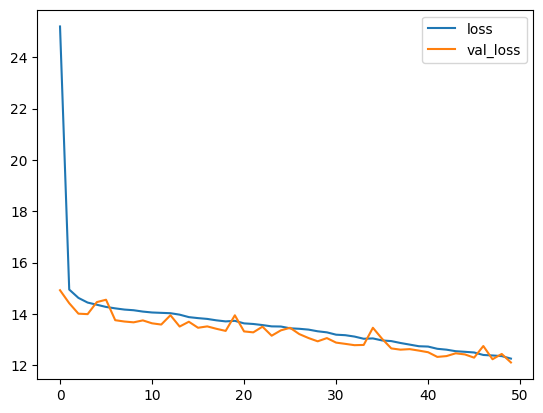

In [35]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


In [36]:
# Make predictions
predictions = model.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


476/476 [==============================] - 1s 1ms/step


12.591346557051118